## Agência Nacional do Cinema - ANCINE

### Desafios e Oportunidades na Indústria Cinematográfica Brasileira

#### **Análise Exploratória de Dados**

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) sobre o conjunto de dados abertos ANCINE - Agência Nacional do Cinema. 

Neste estudo, foram explorados os dados referentes aos Agentes Econômicos cadastrados na ANCINE, assim como suas atividades, Investidores,  Obras cinematográficas, Projetos contratados e outros. 

#### **Contexto de Negócio**

A qualidade e a amplitude da indústria cinematográfica de um país são reflexos não apenas da sua cultura e sociedade, mas também das suas aspirações, desafios e conquistas. No Brasil, embora a indústria cinematográfica seja ativa e produza um número considerável de filmes anualmente em comparação com países de economias semelhantes, ela enfrenta uma batalha cultural com o cinema estrangeiro, principalmente o americano.

O consumo de entretenimento audiovisual no Brasil é largamente dominado pela indústria americana, em parte devido à sua habilidade de produzir filmes com grandes orçamentos e alto apelo comercial. Isso coloca as produções locais em uma competição desafiadora, muitas vezes com recursos financeiros e de marketing limitados em comparação com seus concorrentes estrangeiros.

Um dos principais fatores a considerar é a disparidade no acesso aos recursos dentro da indústria cinematográfica. Enquanto grandes estúdios e produções de alto orçamento geralmente conseguem financiamento e apoio comercial mais facilmente, cineastas independentes e produções de menor escala muitas vezes enfrentam dificuldades para garantir financiamento e distribuição adequada.

Além disso, as políticas públicas e os incentivos governamentais desempenham um papel crucial na sustentabilidade da indústria cinematográfica nacional. Investimentos em programas de financiamento, subsídios e incentivos fiscais podem ajudar a impulsionar a produção local e promover uma maior diversidade de vozes e perspectivas no cinema brasileiro.

___

#### **Objetivo**  

O objetivo principal deste projeto é analisar dados da indústria cinematográfica brasileira para entender melhor os desafios enfrentados e identificar possíveis soluções para promover um ambiente mais sustentável e diversificado para a produção nacional de filmes.

Utilizando técnicas de visualização de dados e estatística descritiva, pretendeu-se identificar insights relevantes que possam contribuir para uma melhor compreensão do mercado brasileiro e para o aprimoramento das políticas de incentivo ao Audiovisual.



---

### 1.Carregamento do Projeto e seu conjunto de dados

Esse projeto conta com um conjunto de dados bem exnteso, com cerce de 35 arquivos .CSV diferentes. Por motivos organizocional e eficiência de execução, esse projeto foi programado orientao a objetos. Foram criadas algumas classes como Projeto(), que executam as classes Leitor_CSV() e Documentacao(), responsáveis pelo pré-processamento dos dados e pela criação da documentação inicial, respectivamente. No corpo das classes foram programadas funções com o objetivo de viabilizar e facilitar o carregamento do Projeto.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sea
from matplotlib import pyplot as plt
from abrir_projeto import Projeto
pj = Projeto()
pj.abrir_projeto()


***Bem vindo(a) ao Projeto!***

Para ler documentação: "pj.doc.documentacao"



#### 1.A - Exibição da Documentação basilar para navegação.

In [2]:
pj.doc.documentacao()

**** DOCUMENTAÇÃO DO PROJETO ****
***Agência Nacional do Cinema***

Cada Arquivo CSV contém uma variável raíz e um 
número de referência para variáveis específicas.
*
*
Para chamar variável no Jupyter Notebook digite: "df." + variável
*
Para chamar variável específica digite: "df." + "variável_especifica" + número
*
*
Nome arquivo CSV | Nome variável raíz | Número variável específica
-
Agentes Econômicos Regulares = agnts_economicos = 1  
Atividades Economicas dos Agentes Regulares = atividade_economicas_agnts = 2 
Projetos Renúncia Fiscal = proj_renuncia_fiscal = 3  
Obras não Publicitárias Brasileiras - Fomento Indireto = obras_n_publi_fomento_direto =  4 
Obras não Publcitárias Brasileiras - Investimento FSA = obras_n_publi_investimento_fsa =  5 
Processos de Prestação de contas = processos_prestacao_contas = 6  
Investidores de projetos de Renúncia Fiscal = investidores_proj_renuncia_fiscal = 7   
Produtoras Independentes = produtoras_independentes = 8 
Produtores de obra não Publi

##### 1.B - Função para carregar variáveis no ambiente local do projeto

In [3]:
#Carregar variáveis no ambiente local (Método para economizar tempo de digitação)
def carregar():
        
        from pandas import DataFrame as pd

        global agnts_economicos
        agnts_economicos = pd(pj.df.agnts_economicos)
        global atividade_economicas_agnts
        atividade_economicas_agnts = pd(pj.df.atividade_economicas_agnts)
        global proj_renuncia_fiscal
        proj_renuncia_fiscal = pd(pj.df.proj_renuncia_fiscal)
        global obras_n_publi_fomento_direto
        obras_n_publi_fomento_direto = pd(pj.df.obras_n_publi_fomento_direto)
        global obras_n_publi_investimento_fsa
        obras_n_publi_investimento_fsa = pd(pj.df.obras_n_publi_investimento_fsa)
        global processos_prestacao_contas
        processos_prestacao_contas = pd(pj.df.processos_prestacao_contas)
        global investidores_proj_renuncia_fiscal
        investidores_proj_renuncia_fiscal = pd(pj.df.investidores_proj_renuncia_fiscal)
        global produtoras_independentes
        produtoras_independentes = pd(pj.df.produtoras_independentes)
        global produtores_obras_n_publi
        produtores_obras_n_publi = pd(pj.df.produtores_obras_n_publi)
        global proj_fsa_desembolso
        proj_fsa_desembolso = pd(pj.df.proj_fsa_desembolso)
        global relacao_grupos_economicos
        relacao_grupos_economicos = pd(pj.df.relacao_grupos_economicos)
        global salas_complexos
        salas_complexos = pd(pj.df.salas_complexos)    
carregar()

In [4]:
def unificar_tabelas_agentes():
    #Natureza Jurídica dos Agentes Econômicos
    #Todo Agente Econômico tem CNPJ e Registro na Ancine
    #Criando Dataframe merged Agentes Economicos Regulares x Atividades Economicas dos Agentes
    agnts_atividades_economicas = pd.merge(agnts_economicos, atividade_economicas_agnts, on='REGISTRO_ANCINE', how='inner')
    agnts_atividades_economicas = agnts_atividades_economicas[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'RAZAO_SOCIAL_x', 'CNPJ_x',
        'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO', 'NATUREZA_JURIDICA', 'ATIVIDADE_ECONOMICA','CLASSIFICACAO_ATIVIDADE', 'BRASILEIRO_INDEPENDENTE']]

    agnts_atividades_economicas.rename(columns={'RAZAO_SOCIAL_x' : 'RAZAO_SOCIAL', 'CNPJ_x' : 'CNPJ'}, inplace=True) #corrigindo nomes das colunas

    agnts_atividades_economicas = agnts_atividades_economicas[agnts_atividades_economicas['CLASSIFICACAO_ATIVIDADE'] == 1] # filtrando a colunaClassificação de atividades para deixar apenas as principais, evitando agentes duplicados

    #Produtoras Independentes
    global produtoras_independentes
    global agnts_tabela_unificada
    produtoras_independentes = produtoras_independentes[['REGISTRO_ANCINE', 'CLASSIFICACAO_NIVEL_PRODUTORA']]
    agnts_tabela_unificada = pd.DataFrame(pd.merge(agnts_atividades_economicas, produtoras_independentes, how='outer', on='REGISTRO_ANCINE'))
    # agnts_tabela_unificada = pd.merge(agnts_atividades_economicas, produtoras_independentes, how='outer', on='REGISTRO_ANCINE') # juntando tabela produtoras_independentes com agnts_atividades_aconomicas
    # agnts_tabela_unificada['CLASSIFICACAO_NIVEL_PRODUTORA'].fillna('0.0', inplace=True) # Preenchendo valor nulo 
    agnts_tabela_unificada['PRODUTORA_INDEPENDENTE'] = agnts_tabela_unificada['CLASSIFICACAO_NIVEL_PRODUTORA'].notna()

    #Criando lista com as principais Atividades Econômicas da indústria cinematográfica

    atividade_economica = ['Atividades de produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente',
        'Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente',
        'Produção de filmes para publicidade',
        'Atividades de produção de fotografias, exceto aérea e submarina',
        'Filmagem de festas e eventos',
        'Estúdios cinematográficos',
        'Atividades de gravação de som e de edição de música',
        'Produção musical',
        'Distribuição cinematográfica, de vídeo e de programas de televisão',
        'Serviços de mixagem sonora em produção audiovisual',
        'Atividades de sonorização e de iluminação',
        'Agências de publicidade',
        'Atividades de produção de fotografias aéreas e submarinas',
        'Atividades de exibição cinematográfica', 'Serviços de dublagem']

    
    agnts_tabela_unificada = agnts_tabela_unificada.loc[agnts_tabela_unificada['ATIVIDADE_ECONOMICA'].isin(atividade_economica)]
    agnts_tabela_unificada = agnts_tabela_unificada.drop_duplicates(subset=['CNPJ'])
    agnts_tabela_unificada
    # global agnts_tabela_unificada
unificar_tabelas_agentes()

In [5]:
gnts_tabela_unificada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13492 entries, 0 to 18573
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   REGISTRO_ANCINE                13492 non-null  int64         
 1   DATA_REGISTRO                  13492 non-null  datetime64[ns]
 2   RAZAO_SOCIAL                   13492 non-null  object        
 3   CNPJ                           13492 non-null  object        
 4   DATA_CONSTITUICAO              13492 non-null  datetime64[ns]
 5   UF                             13492 non-null  object        
 6   MUNICIPIO                      13492 non-null  object        
 7   NATUREZA_JURIDICA              13492 non-null  object        
 8   ATIVIDADE_ECONOMICA            13492 non-null  object        
 9   CLASSIFICACAO_ATIVIDADE        13492 non-null  int64         
 10  BRASILEIRO_INDEPENDENTE        13492 non-null  bool          
 11  CLASSIFICACAO_NIVEL_

---

### 2 - Análise Exploratória Inicial

Como o projeto trabalha com muitos arquivos, foi criada uma função para retornar um perfil do banco de dados escolhido. 

In [6]:
#Função que retorne o perfil de um banco de dados
def perfil_banco_dados(df):

    print('Raio-x')
    print()
    print(df.info())
    print('----')
    print('----')
    print('Estatística Sumária')
    print()
    print(df.describe())


**Qual é a distribuição geográfica das produções cinematográficas no Brasil? Há concentração em determinadas regiões?**  

**Qual é o perfil dos investidores na indústria cinematográfica brasileira? Há diferenças significativas entre investidores de produções de grande escala e produções independentes?**  

Natureza Jurídica dos Agentes Econômicos

Nessa versão do projeto foi escolhido para início 

O que é agente econômico?

Qualquer pessoa natural ou jurídica que participa, independentemente, como sujeito ativo na atividade econômica (audiovisual ou não).

In [7]:
#Natureza Jurídica dos Agentes Econômicos

#Criando Dataframe merged Agentes Economicos Regulares x Atividades Economicas dos Agentes
agnts_atividades_economicas = pd.merge(agnts_economicos, atividade_economicas_agnts, on='REGISTRO_ANCINE', how='inner')
agnts_atividades_economicas = agnts_atividades_economicas[['REGISTRO_ANCINE', 'DATA_REGISTRO', 'RAZAO_SOCIAL_x', 'CNPJ_x',
       'DATA_CONSTITUICAO', 'UF', 'MUNICIPIO', 'NATUREZA_JURIDICA', 'ATIVIDADE_ECONOMICA','CLASSIFICACAO_ATIVIDADE', 'BRASILEIRO_INDEPENDENTE']]

agnts_atividades_economicas.rename(columns={'RAZAO_SOCIAL_x' : 'RAZAO_SOCIAL', 'CNPJ_x' : 'CNPJ'}, inplace=True)

Vamos abrir as informações báscias da tabela para iniciar as análises


In [19]:
#função de raio-x da tabela

perfil_banco_dados(agnts_atividades_economicas)

Raio-x

<class 'pandas.core.frame.DataFrame'>
Index: 13492 entries, 0 to 18573
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   REGISTRO_ANCINE                13492 non-null  int64         
 1   DATA_REGISTRO                  13492 non-null  datetime64[ns]
 2   RAZAO_SOCIAL                   13492 non-null  object        
 3   CNPJ                           13492 non-null  object        
 4   DATA_CONSTITUICAO              13492 non-null  datetime64[ns]
 5   UF                             13492 non-null  object        
 6   MUNICIPIO                      13492 non-null  object        
 7   NATUREZA_JURIDICA              13492 non-null  object        
 8   ATIVIDADE_ECONOMICA            13492 non-null  object        
 9   CLASSIFICACAO_ATIVIDADE        13492 non-null  int64         
 10  BRASILEIRO_INDEPENDENTE        13492 non-null  bool          
 11  CLASSIFICACA

*Por conta do modelo de POO que foi aplicado nesse projeto, os dados foram previamente pré-processados, ou seja, não vamos encontrar tabelas com valores nulos ou colunas com tipos de dados equivocados. Para conhecer a documentação desse processo, clique aqui.*

Com a fusão das tabelas "Agentes Econômicos Regulares" e "Atividades Econômicas dos Agentes Regulares", temos acesso a uma quantidade considerável de dados, permitindo-nos uma compreensão mais profunda da estrutura dessa população. Esta tabela predominantemente apresenta dados jurídicos dos agentes registrados na ANCINE, incluindo CNPJ, Natureza Jurídica e Atividade Econômica. 

Em primeiro lugar podemos ver queessa tabela repete a RAZAO_SOCIAL e o CNPJ dos agentes por ela ser uma tabela que prioriza os dados jurídico do agente, portanto precisamos excluir dados duplicados quando o assunto é titularidade.

Vale ressaltar que a tabela abrange todos os registros de agentes na indústria audiovisual, uma indústria vasta que não se limita apenas às produções cinematográficas. Com base nisso, podemos concluir que, na coluna "Atividade Econômica" é possível que haverá outliers. 

Nós resolveremos parte desses esses outliers filtrando a coluna CLASSIFICACAO_ATIVIDADE, Ela informa qual é a atividade principal do agente, excluindo assim duplicados

In [9]:
agnts_atividades_economicas = agnts_atividades_economicas[agnts_atividades_economicas['CLASSIFICACAO_ATIVIDADE'] == 1]

In [10]:
agnts_atividades_economicas.sample(5)

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,CNPJ,DATA_CONSTITUICAO,UF,MUNICIPIO,NATUREZA_JURIDICA,ATIVIDADE_ECONOMICA,CLASSIFICACAO_ATIVIDADE,BRASILEIRO_INDEPENDENTE
25226,43716,2019-08-08,CAFURINGA FILMES - CONTEÚDOS AUDIOVISUAIS EIRELI,34.037.110/0001-40,2019-06-26,SC,FLORIANÓPOLIS,Empresa Individual de Responsabilidade Limitad...,"Artes cênicas, espetáculos e atividades comple...",1,True
82738,49502,2021-09-13,MALLVA PRODUCOES E MARKETING LTDA,26.824.385/0001-03,2017-01-09,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",1,True
128319,49190,2021-08-05,UP PRODUTORA DE VIDEO LTDA - EPP,27.541.870/0001-24,2017-04-17,TO,PALMAS,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",1,True
98816,2698,2004-11-24,PANORAMICA COMUNICACAO LTDA.,05.565.485/0001-84,2003-03-17,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",1,True
6812,32875,2016-05-06,AC PRODUÇÕES LTDA,06.894.978/0001-20,2004-05-25,PE,RECIFE,Sociedade Empresária Limitada,"Serviços de organização de feiras, congressos,...",1,True


In [11]:
agnts_atividades_economicas['ATIVIDADE_ECONOMICA'].value_counts().head(25)

ATIVIDADE_ECONOMICA
Atividades de produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente        5620
Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente    2305
Produção de filmes para publicidade                                                                                  1387
Filmagem de festas e eventos                                                                                          877
Estúdios cinematográficos                                                                                             691
Artes cênicas, espetáculos e atividades complementares não especificados anteriormente                                622
Agências de publicidade                                                                                               609
Atividades de produção de fotografias, exceto aérea e submarina                                                       593
Serv

Como imaginado, podemos ver que há algumas atividades econômicas listadas que não estão diretamente relacionadas à indústria de produção cinematográfica. Vamos filtrar esses dados para garantir que estejamos focando apenas nas atividades relevantes para nossa análise.


In [12]:
agnts_atividades_economicas

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,CNPJ,DATA_CONSTITUICAO,UF,MUNICIPIO,NATUREZA_JURIDICA,ATIVIDADE_ECONOMICA,CLASSIFICACAO_ATIVIDADE,BRASILEIRO_INDEPENDENTE
0,32426,2016-03-22,+2 PRODUÇÕES CULTURAIS - ME,10.539.519/0001-04,2008-12-08,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",1,True
13,46572,2020-09-11,+242 COMUNICACAO LTDA-ME,23.705.524/0001-83,2015-11-19,DF,BRASÍLIA,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",1,True
17,52179,2022-10-13,.976 LTDA,46.521.620/0001-77,2022-05-24,SC,BLUMENAU,Sociedade Empresária Limitada,Produção de filmes para publicidade,1,True
18,23809,2013-04-19,051 CINE & VIDEO LTDA. - EPP,17.659.837/0001-40,2013-02-13,SP,SÃO PAULO,Sociedade Empresária Limitada,"Atividades de produção cinematográfica, de víd...",1,True
27,44650,2019-11-25,1 KILO GRAVADORA E EDITORA EIRELI,29.318.673/0001-76,2017-12-22,RJ,RIO DE JANEIRO,Empresa Individual de Responsabilidade Limitad...,Atividades de gravação de som e de edição de m...,1,True
...,...,...,...,...,...,...,...,...,...,...,...
136081,797,2002-11-22,ÍRIS CINEMATOGRÁFICA LTDA,73.315.293/0001-70,1993-03-02,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",1,True
136087,42411,2019-03-11,ÍTACA COMUNICACAO,28.878.082/0001-90,2017-10-17,RJ,RIO DE JANEIRO,Empresa Individual de Responsabilidade Limitad...,Marketing direto,1,True
136093,55806,2023-10-20,ÓCIO DO OFÍCIO PRODUCOES ARTISTICAS LTDA,08.277.024/0001-02,2006-08-22,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,Produção teatral,1,True
136098,3429,2005-03-18,ÓPERA PRIMA PRODUÇÕES MULTIMÍDIA LTDA,05.005.711/0001-72,2002-04-10,RJ,RIO DE JANEIRO,Sociedade Simples Limitada,"Atividades de produção cinematográfica, de víd...",1,True


In [13]:
agnts_atividades_economicas['ATIVIDADE_ECONOMICA'].value_counts().head(10).index

Index(['Atividades de produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente',
       'Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente',
       'Produção de filmes para publicidade', 'Filmagem de festas e eventos',
       'Estúdios cinematográficos',
       'Artes cênicas, espetáculos e atividades complementares não especificados anteriormente',
       'Agências de publicidade',
       'Atividades de produção de fotografias, exceto aérea e submarina',
       'Serviços de organização de feiras, congressos, exposições e festas',
       'Produção musical'],
      dtype='object', name='ATIVIDADE_ECONOMICA')

**Qual a distribuição geográfico dos agentes econômicos no Brasil**

**Quais são os principais agentes econômicos atuantes na indústria cinematográfica brasileira?**  

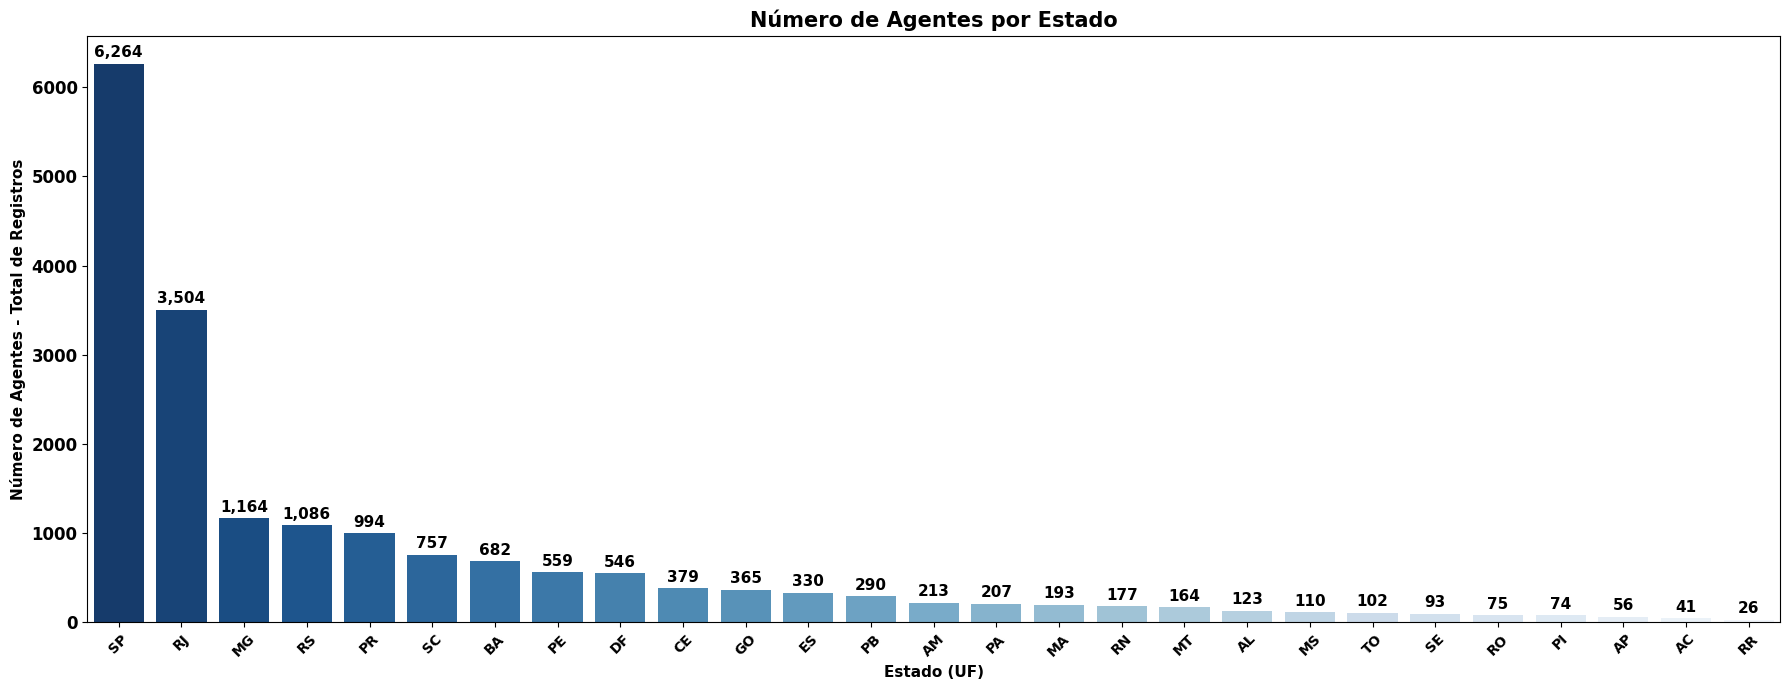

In [14]:
#Barplot com Número de Agentes por Estado
plt.figure(figsize=(18, 7))
ax = sea.countplot(data=agnts_atividades_economicas, x='UF', order=agnts_atividades_economicas['UF'].value_counts().index, palette='Blues_r')

for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points',
                   fontsize=11, fontweight='bold')

plt.title('Número de Agentes por Estado', fontsize=15, fontweight='bold')
plt.xlabel('Estado (UF)', fontsize=11, fontweight='bold')
plt.ylabel('Número de Agentes - Total de Registros', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, fontweight='bold') 
plt.yticks(fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()



Observa-se uma concentração considerável de agentes econômicos nos estados de São Paulo (SP) e Rio de Janeiro (RJ) no setor audiovisual. Tal concentração é influenciada pela centralização das atividades de mercado e da disponibilidade de mão de obra qualificada nesses dois estados.


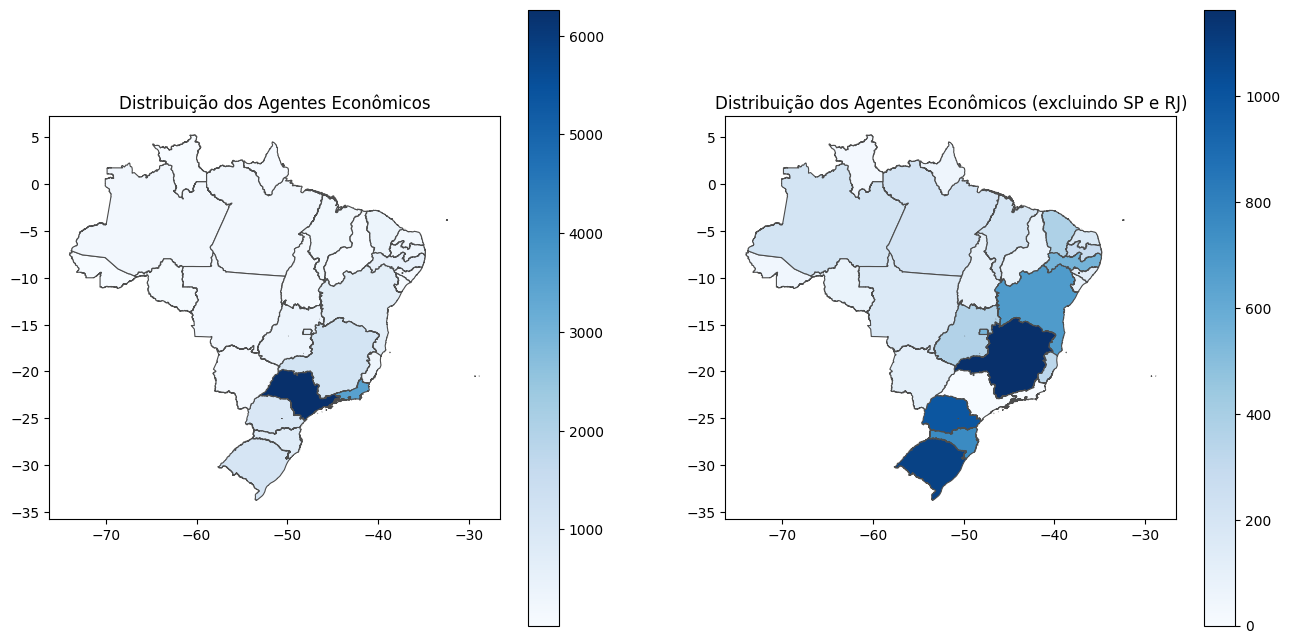

In [15]:
# Carregar mapa BR
brasil = gpd.read_file('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\mix\\BR_UF_2022.shp')

# Plot com todos os estados
totais_por_estado = agnts_atividades_economicas['UF'].value_counts().reset_index()
totais_por_estado.columns = ['UF', 'Total']

brasil = brasil.merge(totais_por_estado, left_on='SIGLA_UF', right_on='UF')

# Filtrar os dados excluindo SP e RJ
estados_sem_sp_rj = agnts_atividades_economicas[(agnts_atividades_economicas['UF'] != 'RJ') & (agnts_atividades_economicas['UF'] != 'SP')]
estados_count = estados_sem_sp_rj['UF'].value_counts().reset_index()
estados_count.columns = ['UF', 'Total']

# Adicionar linhas para SP e RJ com total zero
sp_row = pd.DataFrame({'UF': ['SP'], 'Total': [0]})
rj_row = pd.DataFrame({'UF': ['RJ'], 'Total': [0]})
estados_count = pd.concat([estados_count, sp_row, rj_row], ignore_index=True)

estados_count = estados_count.sort_values(by='UF')
estados_count = estados_count.rename(columns={'UF': 'UF_count', 'Total': 'Total_count'})
brasil = brasil.merge(estados_count, left_on='SIGLA_UF', right_on='UF_count')

# plotar
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# primeiro mapa
brasil.plot(column='Total', cmap='Blues', linewidth=0.8, ax=axs[0], edgecolor='0.3', legend=True)
axs[0].set_title('Distribuição dos Agentes Econômicos')
axs[0].set_xlabel(None)
axs[0].set_ylabel(None)

# segundo mapa
brasil.plot(column='Total_count', cmap='Blues', linewidth=0.8, ax=axs[1], edgecolor='0.3', legend=True)
axs[1].set_title('Distribuição dos Agentes Econômicos (excluindo SP e RJ)')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None)

plt.show()

Para melhor compreender a distribuição dos agentes econômicos, é necessário considerar a exclusão de SP e RJ da análise. Ao realizar essa exclusão, evidenciam-se padrões diferentes de distribuição, refletindo uma dispersão mais equitativa da atividade econômica pelo território nacional. Essa alteração na distribuição reflete as dinâmicas regionais específicas do setor audiovisual fora dos polos tradicionais, revelando potenciais áreas de crescimento e desenvolvimento em outras regiões do país.



In [16]:
#PRODUTORAS INDEPENDENTES
produtora_classificacao = pd.merge(produtoras_independentes, agnts_atividades_economicas, on='REGISTRO_ANCINE')
produtora_classificacao = produtora_classificacao[['RAZAO_SOCIAL_x', 'REGISTRO_ANCINE', 'DATA_REGISTRO', 'CNPJ_x', 'UF_x', 'MUNICIPIO',
       'CLASSIFICACAO_NIVEL_PRODUTORA', 'DATA_CONSTITUICAO', 'NATUREZA_JURIDICA',
       'ATIVIDADE_ECONOMICA', 'CLASSIFICACAO_ATIVIDADE',
       'BRASILEIRO_INDEPENDENTE']]

produtora_classificacao.rename(columns=({
    'RAZAO_SOCIAL_x' : 'RAZAO_SOCIAL',
    'CNPJ_x' : 'CNPJ',
    'UF_x' : 'UF',
}), inplace=True)

KeyError: "['RAZAO_SOCIAL_x', 'CNPJ_x', 'UF_x'] not in index"

Gráfico de comparação entre o numero de produtoras na capital de um estado e o numero nas 5 cidades do interior com maior numero de produtoras

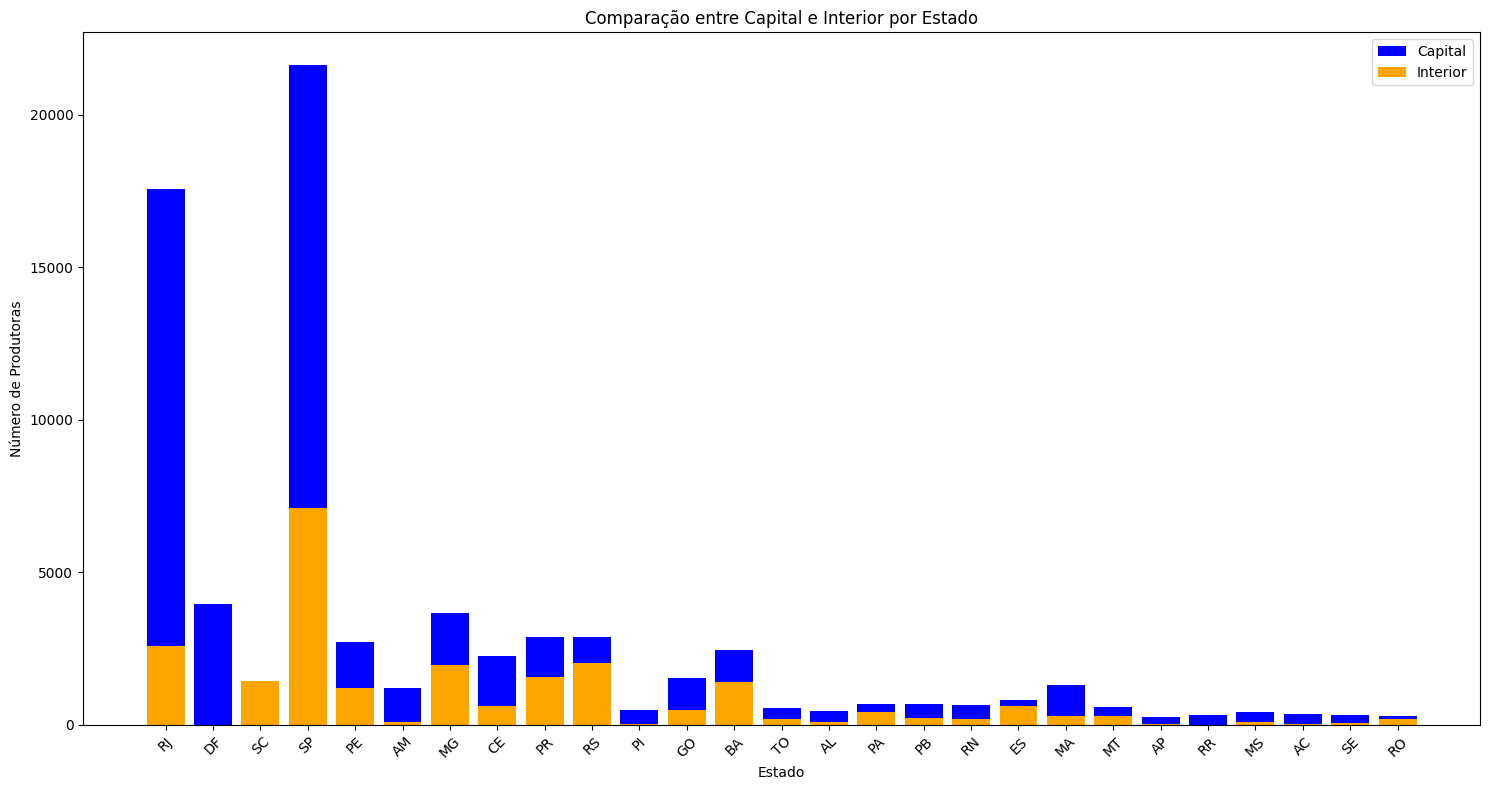

In [ ]:
import matplotlib.pyplot as plt

# Função para comparar capital vs interior em um estado
def capital_vs_interior(uf, produtora_classificacao):
    separar_uf = produtora_classificacao[produtora_classificacao['UF'] == uf]
    capital = separar_uf['MUNICIPIO'].value_counts().head(1)
    interior = separar_uf['MUNICIPIO'].value_counts().sum() - capital 
    nome_capital = capital.index[0]
    capital.rename(index={nome_capital : 'Capital'}, inplace=True)
    interior.rename(index={nome_capital : 'Interior'}, inplace=True)
    return capital, interior

# Lista de estados
estados = ['RJ', 'DF', 'SC', 'SP', 'PE', 'AM', 'MG', 'CE', 'PR', 'RS', 'PI',
           'GO', 'BA', 'TO', 'AL', 'PA', 'PB', 'RN', 'ES', 'MA', 'MT', 'AP',
           'RR', 'MS', 'AC', 'SE', 'RO']

# Listas para armazenar os dados
capitais = []
interiores = []

# Loop sobre cada estado
for uf in estados:
    capital, interior = capital_vs_interior(uf, produtora_classificacao)
    capitais.append(capital)
    interiores.append(interior)

# Plotagem
plt.figure(figsize=(15, 8))

# Plot das capitais
plt.bar(range(len(estados)), [c.values[0] for c in capitais], color='blue', label='Capital')

# Plot dos interiores
plt.bar(range(len(estados)), [i.values[0] for i in interiores], color='orange', label='Interior')

plt.xlabel('Estado')
plt.ylabel('Número de Produtoras')
plt.title('Comparação entre Capital e Interior por Estado')
plt.xticks(range(len(estados)), estados)  # Definindo os rótulos do eixo x como os estados
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

estados = [['RJ', 'DF', 'SC', 'SP', 'PE', 'AM', 'MG', 'CE', 'PR', 'RS', 'PI',
       'GO', 'BA', 'TO', 'AL', 'PA', 'PB', 'RN', 'ES', 'MA', 'MT', 'AP',
       'RR', 'MS', 'AC', 'SE', 'RO']]


for uf in estados:

    def capital_vs_interior(uf):

        separar_uf = produtora_classificacao[produtora_classificacao['UF'] == uf]
        capital = separar_uf['MUNICIPIO'].value_counts().head(1)
        interior = separar_uf['MUNICIPIO'].value_counts().sum() - capital 
        nome_capital = capital.index[0]
        capital.rename(index={nome_capital : 'Capital'}, inplace=True)
        interior.rename(index={nome_capital : 'Interior'}, inplace=True)
        print(capital)
        print(interior)

        #PLOT
            # Plotar
        plt.figure(figsize=(8,6))
        plt.bar(nome_capital.capitalize(), capital.values, color='blue', label='Capital')
        plt.bar(interior.index, interior.values, color='orange', label='Interior')
        plt.xlabel('Cidade')
        plt.ylabel('Número de Produtoras')
        plt.title('Comparação entre Capital e Interior (' + uf + ')')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    capital_vs_interior(uf)

ValueError: ('Lengths must match to compare', (95054,), (27,))

In [ ]:
produtora_classificacao['UF'].unique()

array(['RJ', 'DF', 'SC', 'SP', 'PE', 'AM', 'MG', 'CE', 'PR', 'RS', 'PI',
       'GO', 'BA', 'TO', 'AL', 'PA', 'PB', 'RN', 'ES', 'MA', 'MT', 'AP',
       'RR', 'MS', 'AC', 'SE', 'RO'], dtype=object)

---

Estuando mais o tema, vamos analisar o ranking de natureza juridica dos agentes econômicos

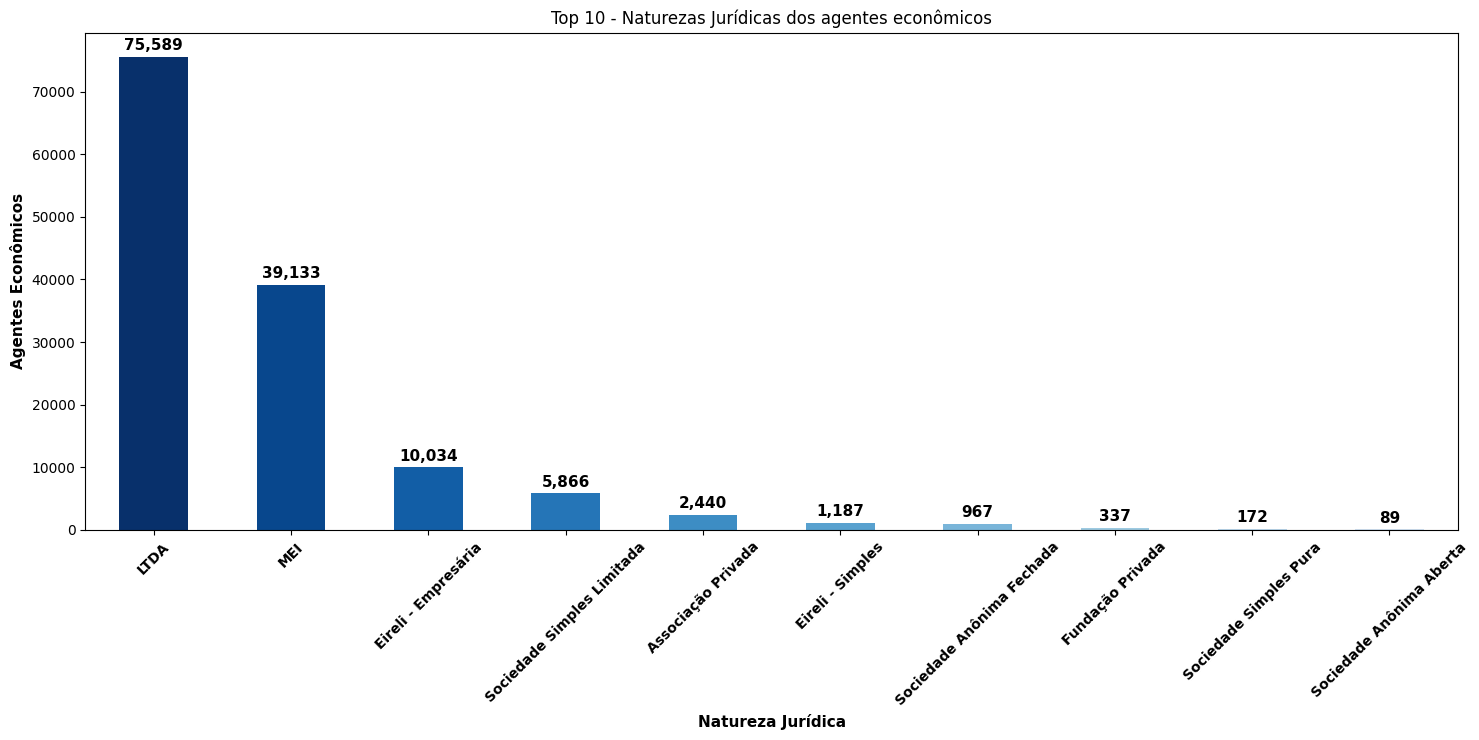

In [ ]:
#Naturezas Jurídicas
consultas = {
    'ltda': agnts_economicos.query("NATUREZA_JURIDICA == 'Sociedade Empresária Limitada'"),
    'mei': agnts_economicos.query("NATUREZA_JURIDICA == 'Empresário (Individual)'"),
    'eireli_empresaria': agnts_economicos.query("NATUREZA_JURIDICA == 'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)'"),
    'ss_limitada': agnts_economicos.query("NATUREZA_JURIDICA == 'Sociedade Simples Limitada'"),
    'associacao_privada': agnts_economicos.query("NATUREZA_JURIDICA == 'Associação Privada'"),
    'eireli_simples': agnts_economicos.query("NATUREZA_JURIDICA == 'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)'"),
    'sa_fechada': agnts_economicos.query("NATUREZA_JURIDICA == 'Sociedade Anônima Fechada'")
}

globals().update(consultas)

natureza_juridica = pd.DataFrame(agnts_atividades_economicas)
natureza_juridica['NATUREZA_JURIDICA'] = natureza_juridica['NATUREZA_JURIDICA'].replace({
    'Sociedade Empresária Limitada' : 'LTDA',
    'Empresário (Individual)': 'MEI',
    'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)' : 'Eireli - Empresária',
    'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)' : 'Eireli - Simples'
})
ranking_natureza_juridica_top_10 = natureza_juridica['NATUREZA_JURIDICA'].value_counts().head(10)
ranking_natureza_juridica_top_10

plt.figure(figsize=(15,7.5))
cores = plt.cm.Blues(np.linspace(1, 0.2, len(ranking_natureza_juridica_top_10)))
ax = ranking_natureza_juridica_top_10.plot(kind='bar', color=cores)

for n in ax.patches:
    ax.annotate(format(n.get_height(), ',.0f'), 
                    (n.get_x() + n.get_width() / 2., n.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 8), 
                    textcoords = 'offset points',
                    fontsize=11, fontweight='bold')

plt.title('Top 10 - Naturezas Jurídicas dos agentes econômicos')
plt.xlabel('Natureza Jurídica', fontsize=11, fontweight='bold')
plt.ylabel('Agentes Econômicos', fontsize=11, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.tight_layout()
plt.show()


a diferença na mancha do mapa entre as Naturezas Jurídicas

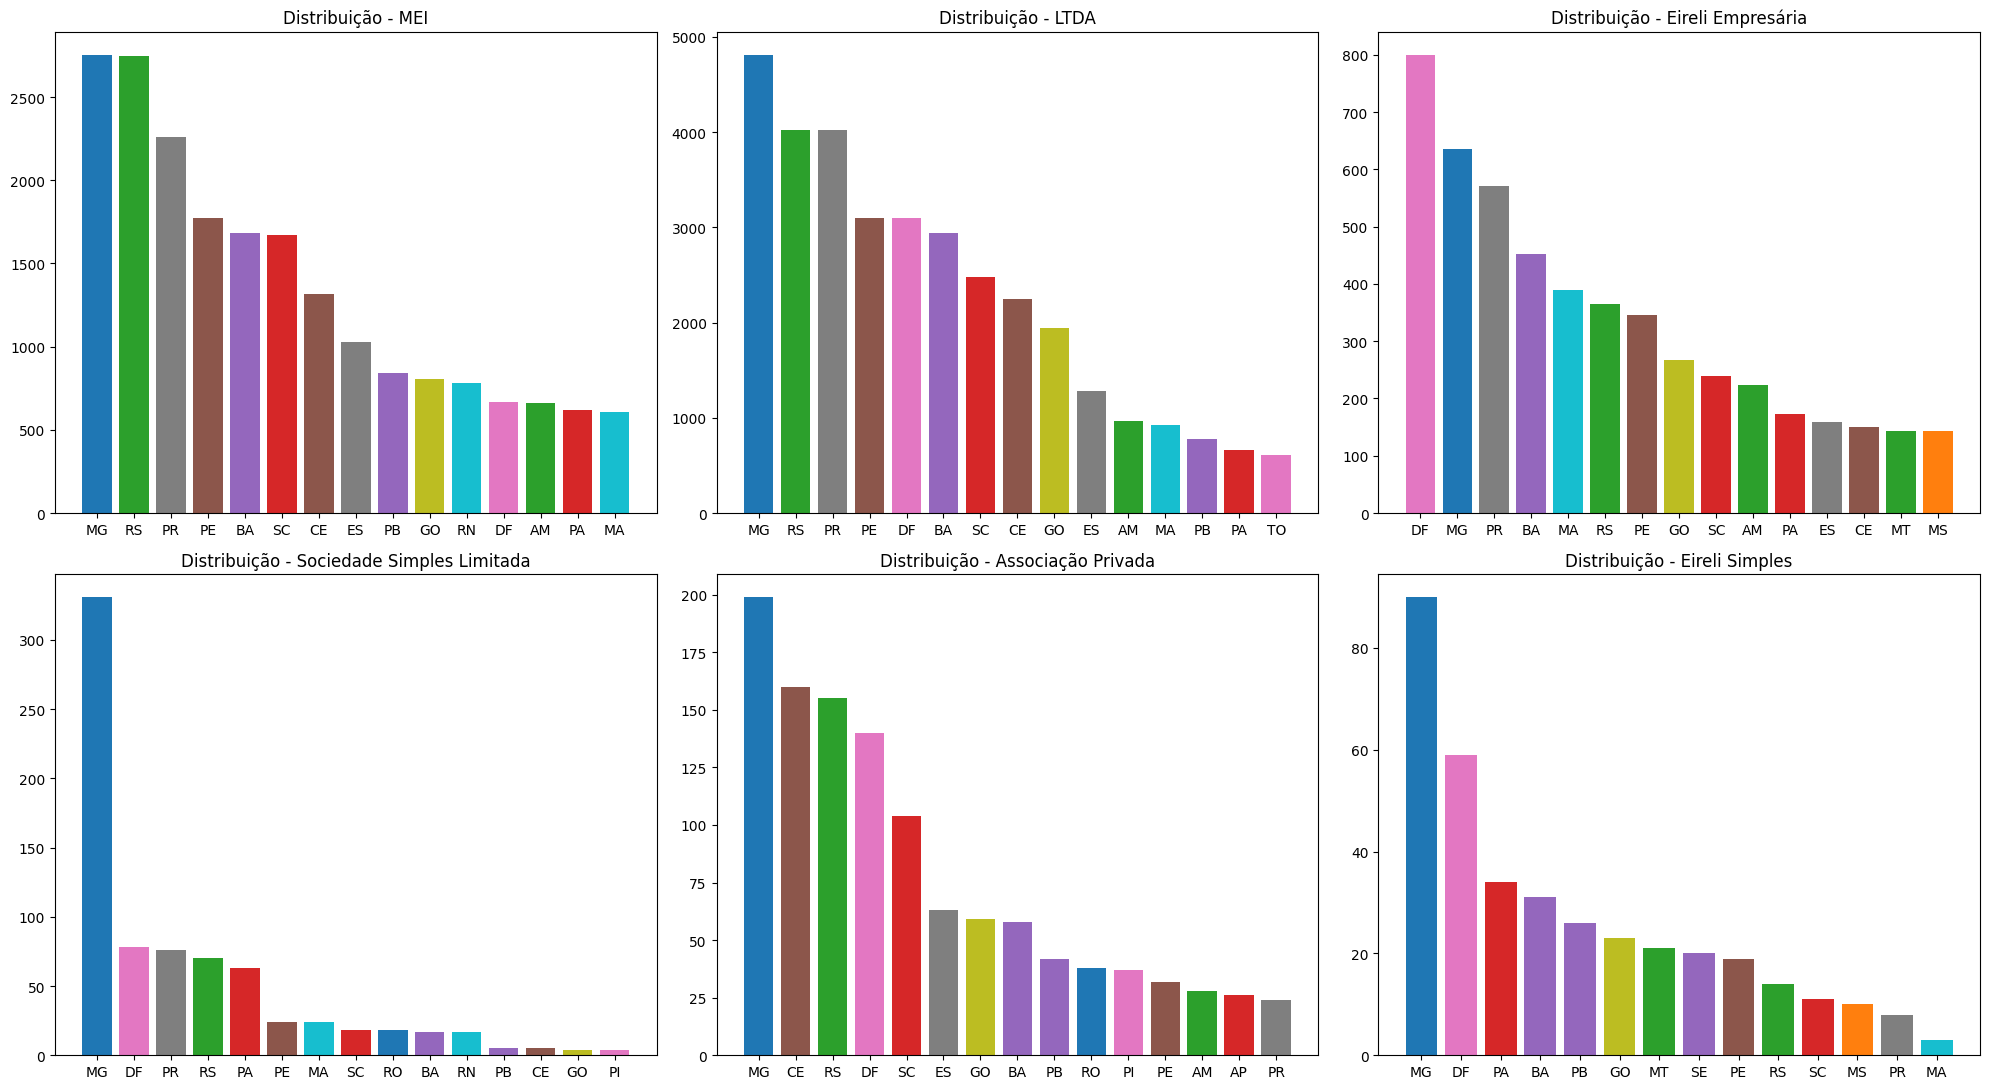

In [ ]:

def barplot_natureza_juridica():

    global agnts_atividades_economicas

    # Calcular totais - MEI
    data_sem_sp_rj = agnts_atividades_economicas[(agnts_atividades_economicas['UF'] != 'SP') & (agnts_atividades_economicas['UF'] != 'RJ')]
    
    #MEI
    mei = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Empresário (Individual)']
    mei_totais = mei['UF'].value_counts().reset_index().head(15)
    mei_totais.columns = ['UF', 'Total_MEI']

    #LTDA
    ltda = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Sociedade Empresária Limitada']
    ltda_totais = ltda['UF'].value_counts().reset_index().head(15)
    ltda_totais.columns = ['UF', 'Total_LTDA']

    #Eireli Empresária
    eireli_empresaria = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)']
    eireli_empresaria_totais = eireli_empresaria['UF'].value_counts().reset_index().head(15)
    eireli_empresaria_totais.columns = ['UF', 'Total_Eireli_Empresaria']

    #Sociedade Simples Limitada
    ss_limitada = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Sociedade Simples Limitada']
    ss_limitada_totais = ss_limitada['UF'].value_counts().reset_index().head(15)
    ss_limitada_totais.columns = ['UF', 'Total_SS_limitada']

    #Associação Privada
    associacao_privada = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Associação Privada']
    associacao_privada_totais = associacao_privada['UF'].value_counts().reset_index().head(15)
    associacao_privada_totais.columns = ['UF', 'Total_Associacao_Privada']

    #Eireli Empresária
    eireli_simples = data_sem_sp_rj[data_sem_sp_rj['NATUREZA_JURIDICA'] == 'Empresa Individual de Responsabilidade Limitada (de Natureza Simples)']
    eireli_simples_totais = eireli_simples['UF'].value_counts().reset_index().head(15)
    eireli_simples_totais.columns = ['UF', 'Total_Eireli_Simples']


    cores_por_uf = {
    'AC': '#1f77b4',  # Azul
    'AL': '#ff7f0e',  # Laranja
    'AM': '#2ca02c',  # Verde
    'AP': '#d62728',  # Vermelho
    'BA': '#9467bd',  # Roxo
    'CE': '#8c564b',  # Marrom
    'DF': '#e377c2',  # Rosa
    'ES': '#7f7f7f',  # Cinza
    'GO': '#bcbd22',  # Amarelo
    'MA': '#17becf',  # Azul claro
    'MG': '#1f77b4',  # Azul
    'MS': '#ff7f0e',  # Laranja
    'MT': '#2ca02c',  # Verde
    'PA': '#d62728',  # Vermelho
    'PB': '#9467bd',  # Roxo
    'PE': '#8c564b',  # Marrom
    'PI': '#e377c2',  # Rosa
    'PR': '#7f7f7f',  # Cinza
    'RJ': '#bcbd22',  # Amarelo
    'RN': '#17becf',  # Azul claro
    'RO': '#1f77b4',  # Azul
    'RR': '#ff7f0e',  # Laranja
    'RS': '#2ca02c',  # Verde
    'SC': '#d62728',  # Vermelho
    'SE': '#9467bd',  # Roxo
    'SP': '#8c564b',  # Marrom
    'TO': '#e377c2'   # Rosa
}


    #PLOT
    # Plotar mapas lado a lado
    fig, axs = plt.subplots(2, 3, figsize=(20, 11))

    # Primeiro mapa - MEI
    axs[0, 0].bar(x=mei_totais['UF'], height=mei_totais['Total_MEI'], color=[cores_por_uf.get(uf, 'gray') for uf in mei_totais['UF']])
    axs[0, 0].set_title('Distribuição - MEI')
    axs[0, 0].set_xlabel(None)
    axs[0, 0].set_ylabel(None)

    # Segundo mapa - LTDA
    axs[0, 1].bar(x=ltda_totais['UF'], height=ltda_totais['Total_LTDA'], color=[cores_por_uf.get(uf, 'gray') for uf in ltda_totais['UF']])
    axs[0, 1].set_title('Distribuição - LTDA')
    axs[0, 1].set_xlabel(None)
    axs[0, 1].set_ylabel(None)

    # Terceiro mapa - Eireli Empresária
    axs[0, 2].bar(x=eireli_empresaria_totais['UF'], height=eireli_empresaria_totais['Total_Eireli_Empresaria'], color=[cores_por_uf.get(uf, 'gray') for uf in eireli_empresaria_totais['UF']])
    axs[0, 2].set_title('Distribuição - Eireli Empresária')
    axs[0, 2].set_xlabel(None)
    axs[0, 2].set_ylabel(None)

    # Quarto mapa - Sociedade Simples Limitada
    axs[1, 0].bar(x=ss_limitada_totais['UF'], height=ss_limitada_totais['Total_SS_limitada'], color=[cores_por_uf.get(uf, 'gray') for uf in ss_limitada_totais['UF']])
    axs[1, 0].set_title('Distribuição - Sociedade Simples Limitada')
    axs[1, 0].set_xlabel(None)
    axs[1, 0].set_ylabel(None)

    # Quinto mapa - Associação Privada
    axs[1, 1].bar(x=associacao_privada_totais['UF'], height=associacao_privada_totais['Total_Associacao_Privada'], color=[cores_por_uf.get(uf, 'gray') for uf in associacao_privada_totais['UF']])
    axs[1, 1].set_title('Distribuição - Associação Privada')
    axs[1, 1].set_xlabel(None)
    axs[1, 1].set_ylabel(None)

    # Sexto mapa - Eireli Simples
    axs[1, 2].bar(x=eireli_simples_totais['UF'], height=eireli_simples_totais['Total_Eireli_Simples'], color=[cores_por_uf.get(uf, 'gray') for uf in eireli_simples_totais['UF']])
    axs[1, 2].set_title('Distribuição - Eireli Simples')
    axs[1, 2].set_xlabel(None)
    axs[1, 2].set_ylabel(None)

    plt.tight_layout()
    plt.show()
barplot_natureza_juridica()

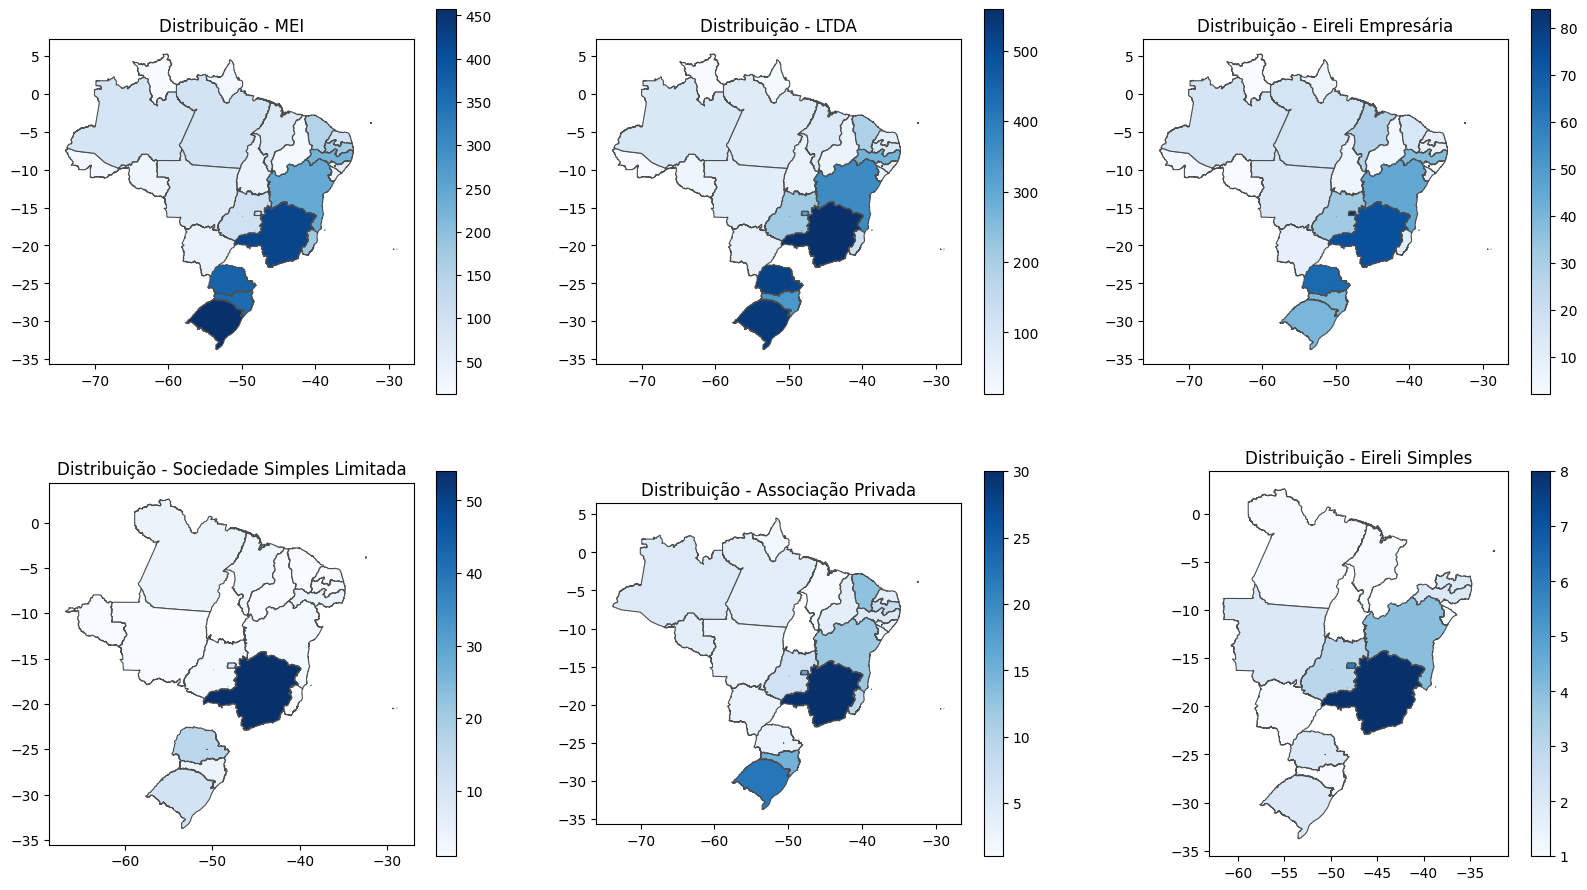

In [ ]:
# brasil_pre_2 = gpd.read_file('C:\\Users\\syafo\\OneDrive\\Documentos\\GitHub\\AgenciaNacionalDoCinema_ANCINE\\mix\\BR_UF_2022.shp')
# brasil_2 = brasil_pre_2[(brasil_pre_2['SIGLA_UF'] != 'SP') & (brasil_pre_2['SIGLA_UF'] != 'RJ')]
# # Calcular totais - MEI
# mei_totais = mei['UF'].value_counts().reset_index()
# mei_totais.columns = ['UF', 'Total_MEI']
# brasil_2_mei = brasil_2.merge(mei_totais, left_on='SIGLA_UF', right_on='UF')

# # Calcular totais - LTDA
# ltda_totais = ltda['UF'].value_counts().reset_index()
# ltda_totais.columns = ['UF', 'Total_LTDA']
# brasil_2_ltda = brasil_2.merge(ltda_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Eireli Simples
# eireli_simples_totais = eireli_simples['UF'].value_counts().reset_index()
# eireli_simples_totais.columns = ['UF', 'Total_Eireli_Simples']
# brasil_2_eireli_simples = brasil_2.merge(eireli_simples_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Eireli Empresária
# eireli_empresaria_totais = eireli_empresaria['UF'].value_counts().reset_index()
# eireli_empresaria_totais.columns = ['UF', 'Total_Eireli_Empresaria']
# brasil_2_eireli_empresaria = brasil_2.merge(eireli_empresaria_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Sociedade Simples Limitada
# ss_limitada_totais = ss_limitada['UF'].value_counts().reset_index()
# ss_limitada_totais.columns = ['UF', 'Total_SS_limitada']
# brasil_2_ss_limitada = brasil_2.merge(ss_limitada_totais, left_on='SIGLA_UF', right_on='UF')

# #Calcular totais - Associação Privada
# associacao_privada_totais = associacao_privada['UF'].value_counts().reset_index()
# associacao_privada_totais.columns = ['UF', 'Total_Associacao_Privada']
# brasil_2_associacao_privada = brasil_2.merge(associacao_privada_totais, left_on='SIGLA_UF', right_on='UF')

# #PLOT
# # Plotar mapas lado a lado
# fig, axs = plt.subplots(2, 3, figsize=(20, 11))

# # Primeiro mapa - MEI
# brasil_2_mei.plot(column='Total_MEI', cmap='Blues', linewidth=0.8, ax=axs[0][0], edgecolor='0.3', legend=True)
# axs[0][0].set_title('Distribuição - MEI')
# axs[0][0].set_xlabel(None)
# axs[0][0].set_ylabel(None)

# # Segundo mapa - LTDA
# brasil_2_ltda.plot(column='Total_LTDA', cmap='Blues', linewidth=0.8, ax=axs[0][1], edgecolor='0.3', legend=True)
# axs[0][1].set_title('Distribuição - LTDA')
# axs[0][1].set_xlabel(None)
# axs[0][1].set_ylabel(None)

# # Terceiro mapa - Eireli Empresária
# brasil_2_eireli_empresaria.plot(column='Total_Eireli_Empresaria', cmap='Blues', linewidth=0.8, ax=axs[0][2], edgecolor='0.3', legend=True)
# axs[0][2].set_title('Distribuição - Eireli Empresária')
# axs[0][2].set_xlabel(None)
# axs[0][2].set_ylabel(None)

# # Quarto mapa - Sociedade Simples Limitada
# brasil_2_ss_limitada.plot(column='Total_SS_limitada', cmap='Blues', linewidth=0.8, ax=axs[1][0], edgecolor='0.3', legend=True)
# axs[1][0].set_title('Distribuição - Sociedade Simples Limitada')
# axs[1][0].set_xlabel(None)
# axs[1][0].set_ylabel(None)

# # Quinto mapa - Associação Privada
# brasil_2_associacao_privada.plot(column='Total_Associacao_Privada', cmap='Blues', linewidth=0.8, ax=axs[1][1], edgecolor='0.3', legend=True)
# axs[1][1].set_title('Distribuição - Associação Privada')
# axs[1][1].set_xlabel(None)
# axs[1][1].set_ylabel(None)

# # Sexto mapa - Eireli Simples
# brasil_2_eireli_simples.plot(column='Total_Eireli_Simples', cmap='Blues', linewidth=0.8, ax=axs[1][2], edgecolor='0.3', legend=True)
# axs[1][2].set_title('Distribuição - Eireli Simples')
# axs[1][2].set_xlabel(None)
# axs[1][2].set_ylabel(None)


# plt.show()


---

In [ ]:
agnts_atividades_economicas.sample(5)

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,CNPJ,DATA_CONSTITUICAO,UF,MUNICIPIO,NATUREZA_JURIDICA,ATIVIDADE_ECONOMICA,CLASSIFICACAO_ATIVIDADE,BRASILEIRO_INDEPENDENTE
102197,6031,2006-07-10,PLANO 9 PRODUÇÕES AUDIOVISUAIS LTDA,07.617.370/0001-11,2005-09-29,PE,RECIFE,Sociedade Empresária Limitada,"Gestão de espaços para artes cênicas, espetácu...",0,True
84483,53571,2023-06-05,MARCOS PAULO FERREIRA DA SILVA,43.882.108/0001-68,2021-10-14,PE,OLINDA,Empresário (Individual),"Atividades de pós-produção cinematográfica, de...",0,False
135921,56575,2023-11-23,ZÉ LIVRÓRIO PRODUÇÕES ARTÍSTICAS LTDA,47.730.558/0001-96,2022-08-26,BA,SALVADOR,Sociedade Empresária Limitada,"Artes cênicas, espetáculos e atividades comple...",1,True
38882,26341,2014-03-17,DELIRIUM FILMES LTDA,18.973.798/0001-13,2013-09-27,RJ,RIO DE JANEIRO,Sociedade Empresária Limitada,Atividades de consultoria em gestão empresaria...,0,True
17540,6089,2006-07-20,ATUA COMUNICAÇÃO LTDA,07.267.002/0001-90,2005-03-16,RO,PORTO VELHO,Sociedade Empresária Limitada,Serviços de dublagem,0,True


Mapa das produtoras independentes por pontuação

In [ ]:
produtoras_independentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   RAZAO_SOCIAL                   11354 non-null  object
 1   REGISTRO_ANCINE                11354 non-null  int64 
 2   CNPJ                           11354 non-null  object
 3   UF                             11354 non-null  object
 4   CLASSIFICACAO_NIVEL_PRODUTORA  11354 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 443.6+ KB


In [ ]:
agnts_atividades_economicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136112 entries, 0 to 136111
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   REGISTRO_ANCINE          136112 non-null  int64         
 1   DATA_REGISTRO            136112 non-null  datetime64[ns]
 2   RAZAO_SOCIAL             136112 non-null  object        
 3   CNPJ                     136112 non-null  object        
 4   DATA_CONSTITUICAO        136112 non-null  datetime64[ns]
 5   UF                       136112 non-null  object        
 6   MUNICIPIO                136112 non-null  object        
 7   NATUREZA_JURIDICA        136112 non-null  object        
 8   ATIVIDADE_ECONOMICA      136112 non-null  object        
 9   CLASSIFICACAO_ATIVIDADE  136112 non-null  int64         
 10  BRASILEIRO_INDEPENDENTE  136112 non-null  bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(6)
memory usage: 10.5+ MB


In [ ]:

produtora_classificacao['ATIVIDADE_ECONOMICA'].sample(10).values


array(['Atividades de produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente',
       'Produção de filmes para publicidade', 'Estúdios cinematográficos',
       'Agências de viagens',
       'Serviços de acabamentos gráficos, exceto encadernação e plastificação',
       'Agências de notícias',
       'Atividades de produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente',
       'Artes cênicas, espetáculos e atividades complementares não especificados anteriormente',
       'Agências de publicidade',
       'Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão não especificadas anteriormente'],
      dtype=object)